In [73]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [74]:
statement_dates = pd.read_csv('sentiment_dates.csv')
spx = pd.read_csv('.\index_data\$SPX.csv',parse_dates=['Date'])

In [75]:
dateparse = lambda x: pd.datetime.strptime(x, '%d%m%Y')
state_date_parse = lambda x: pd.datetime.strptime(x, '%Y%m%d')
spx['Date']=spx['Date'].apply(dateparse)

C:\Users\Maln\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [76]:
spx=spx.set_index(['Date'])

Dropping unneeded columns (Open interest, ticker) and limiting time frame of data

In [77]:
spx.drop(columns=['Open Interest','Ticker'], inplace=True)
spx = spx['2000-01-01':]


Applying date parsing process

In [78]:
statement_dates['Statement']=np.ones(len(statement_dates))

statement_dates['Dates']=statement_dates['Dates'].apply(lambda x : str(x))

statement_dates['Dates']=statement_dates['Dates'].apply(state_date_parse)

statement_dates['Statement']=statement_dates['Statement'].apply(lambda x : int(x))

statement_dates=statement_dates.set_index(['Dates'])
statement_dates=statement_dates.drop('Unnamed: 0',axis=1)


C:\Users\Maln\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [79]:

spx_statements =spx.join(statement_dates, how='outer')


In [80]:
spx_statements = spx_statements[:'2019-03-01']

In [81]:
spx_statements[['Summary of Econ Projections','Statement']]=spx_statements[['Summary of Econ Projections','Statement']].fillna(0)

Text(0.5, 0, 'Date')

<Figure size 432x288 with 0 Axes>

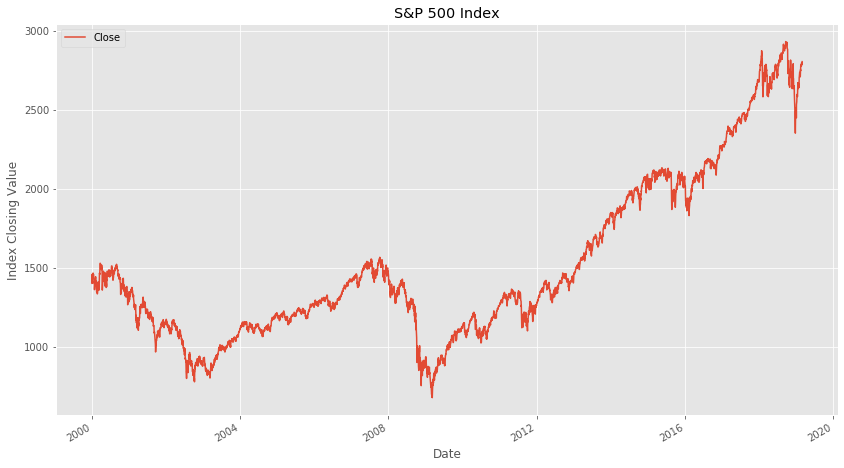

In [82]:
plt.figure()
spx_statements.plot(y='Close',figsize=(14,8),title= 'S&P 500 Index')
plt.ylabel('Index Closing Value')
plt.xlabel('Date')

In [83]:
spx_statements['Close'].idxmin() 

Timestamp('2009-03-09 00:00:00')

In [84]:
spx_statements['2010-05-08':'2010-05-12']

,Open,High,Low,Close,Volume,Summary of Econ Projections,polarity,subjectivity,LM_POS,LM_neg,CB_POS,CB_neg,word_count,Statement
2010-05-09,NaN,NaN,NaN,NaN,NaN,0.0,0.028333,0.257667,1.0,2.0,1.0,2.0,267.0,1.0
2010-05-10,1122.27002,1163.84998,1122.27002,1159.72998,5.925800e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2010-05-11,1156.39001,1170.47998,1147.70996,1155.79004,4.776800e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2010-05-12,1155.43005,1172.87000,1155.43005,1171.67004,4.323200e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [85]:
spx_statements['close_pct_change']=spx_statements.pct_change()['Close'].shift(-1)
spx_statements['prev_close_change']=spx_statements.pct_change()['Close']

In [86]:
spx_statements.head()

,Open,High,Low,Close,Volume,Summary of Econ Projections,polarity,subjectivity,LM_POS,LM_neg,CB_POS,CB_neg,word_count,Statement,close_pct_change,prev_close_change
2000-01-03,1469.25000,1478.00000,1438.35999,1455.17004,1.153700e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.038312,NaN
2000-01-04,1455.21997,1455.21997,1397.43005,1399.42004,1.216500e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001922,-0.038312
2000-01-05,1399.42004,1413.27002,1377.68005,1402.10999,1.422400e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000956,0.001922
2000-01-06,1402.10999,1411.90002,1392.02002,1403.44995,1.322900e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.027090,0.000956
2000-01-07,1403.44995,1441.46997,1400.72998,1441.46997,1.472800e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.011190,0.027090


In [87]:
spx_statements['two_pct_change']=spx_statements['Close'].pct_change(periods=2)
spx_statements['two_pct_change']=spx_statements['two_pct_change'].shift(periods=-2)

spx_statements['three_pct_change']=spx_statements['Close'].pct_change(periods=3)
spx_statements['three_pct_change']=spx_statements['three_pct_change'].shift(periods=-3)

spx_statements['four_pct_change']=spx_statements['Close'].pct_change(periods=4)
spx_statements['four_pct_change']=spx_statements['four_pct_change'].shift(periods=-4)

spx_statements['five_pct_change']=spx_statements['Close'].pct_change(periods=5)
spx_statements['five_pct_change']=spx_statements['five_pct_change'].shift(periods=-5)

spx_statements.head()

,Open,High,Low,Close,Volume,Summary of Econ Projections,polarity,subjectivity,LM_POS,LM_neg,CB_POS,CB_neg,word_count,Statement,close_pct_change,prev_close_change,two_pct_change,three_pct_change,four_pct_change,five_pct_change
2000-01-03,1469.25000,1478.00000,1438.35999,1455.17004,1.153700e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.038312,NaN,-0.036463,-0.035542,-0.009415,0.001670
2000-01-04,1455.21997,1455.21997,1397.43005,1399.42004,1.216500e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001922,-0.038312,0.002880,0.030048,0.041574,0.027969
2000-01-05,1399.42004,1413.27002,1377.68005,1402.10999,1.422400e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000956,0.001922,0.028072,0.039576,0.025997,0.021346
2000-01-06,1402.10999,1411.90002,1392.02002,1403.44995,1.322900e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.027090,0.000956,0.038584,0.025017,0.020371,0.032940
2000-01-07,1403.44995,1441.46997,1400.72998,1441.46997,1.472800e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.011190,0.027090,-0.002019,-0.006542,0.005696,0.016428


In [88]:
spx_statements['open_pct_change']=spx_statements['Open'].pct_change()


In [89]:
spx_statements['2010-05-08':'2010-05-12']

,Open,High,Low,Close,Volume,Summary of Econ Projections,polarity,subjectivity,LM_POS,LM_neg,...,CB_neg,word_count,Statement,close_pct_change,prev_close_change,two_pct_change,three_pct_change,four_pct_change,five_pct_change,open_pct_change
2010-05-09,NaN,NaN,NaN,NaN,NaN,0.0,0.028333,0.257667,1.0,2.0,...,2.0,267.0,1.0,0.043974,0.000000,0.040427,0.054722,0.041913,0.022325,0.000000
2010-05-10,1122.27002,1163.84998,1122.27002,1159.72998,5.925800e+09,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,-0.003397,0.043974,0.010296,-0.001975,-0.020738,-0.019651,-0.004232
2010-05-11,1156.39001,1170.47998,1147.70996,1155.79004,4.776800e+09,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.013740,-0.003397,0.001428,-0.017399,-0.016309,-0.030274,0.030403
2010-05-12,1155.43005,1172.87000,1155.43005,1171.67004,4.323200e+09,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,-0.012145,0.013740,-0.030717,-0.029642,-0.043417,-0.048324,-0.000830


Error: one statement was released on Sunday, no comparable price change. 
This date was a Sunday. Push Effects forward

In [90]:
pd.DataFrame(spx_statements[spx_statements['Statement']==1]['close_pct_change'].describe())

,close_pct_change
count,163.000000
mean,-0.001138
std,0.015314
min,-0.076167
25%,-0.008770
50%,-0.000053
75%,0.006158
max,0.043974


In [91]:
pd.DataFrame(spx_statements['close_pct_change'].describe())

,close_pct_change
count,4820.000000
mean,0.000209
std,0.012039
min,-0.090350
25%,-0.004800
50%,0.000531
75%,0.005686
max,0.115800


In [92]:
pd.DataFrame(spx_statements[spx_statements['Statement']==0]['close_pct_change'].describe())

,close_pct_change
count,4657.000000
mean,0.000256
std,0.011908
min,-0.090350
25%,-0.004716
50%,0.000539
75%,0.005658
max,0.115800


In [93]:
pd.DataFrame({'LM_POS':spx_statements[spx_statements['Statement']==1]['LM_POS'].describe(),
              'LM_neg':spx_statements[spx_statements['Statement']==1]['LM_neg'].describe()})

,LM_POS,LM_neg
count,163.000000,163.000000
mean,7.785276,7.134969
std,5.112008,5.285101
min,0.000000,0.000000
25%,4.000000,3.000000
50%,7.000000,7.000000
75%,10.000000,10.000000
max,28.000000,31.000000


In [94]:
spx_statements[spx_statements['Statement']==1].describe().drop(columns=['Open','High','Low','Close',
                                                                        'Volume','Summary of Econ Projections',
                                                                        'Statement'])

,polarity,subjectivity,LM_POS,LM_neg,CB_POS,CB_neg,word_count,close_pct_change,prev_close_change,two_pct_change,three_pct_change,four_pct_change,five_pct_change,open_pct_change
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.080199,0.351940,7.785276,7.134969,4.036810,2.656442,528.570552,-0.001138,0.003171,-0.001561,-0.000413,-0.000530,-0.001249,0.000208
std,0.039870,0.067781,5.112008,5.285101,3.331276,2.623212,287.552635,0.015314,0.013801,0.018114,0.019857,0.021439,0.022379,0.015215
min,-0.008750,0.100000,0.000000,0.000000,0.000000,0.000000,70.000000,-0.076167,-0.049216,-0.087031,-0.062171,-0.070247,-0.078279,-0.065291
25%,0.048662,0.310772,4.000000,3.000000,1.500000,0.500000,362.500000,-0.008770,-0.003873,-0.012001,-0.007987,-0.014523,-0.014268,-0.003624
50%,0.078180,0.343056,7.000000,7.000000,3.000000,2.000000,496.000000,-0.000053,0.000911,0.000162,0.001316,0.001740,0.002474,0.000843
75%,0.104980,0.382560,10.000000,10.000000,6.000000,4.000000,600.500000,0.006158,0.008906,0.007602,0.009921,0.011009,0.009866,0.005960
max,0.212000,0.574091,28.000000,31.000000,20.000000,13.000000,2122.000000,0.043974,0.051360,0.052058,0.054722,0.081347,0.060189,0.106712


In [95]:
spx_statements[spx_statements['Statement']==0].describe().drop(columns=['Open','High','Low','Close',
                                                                        'Volume','Summary of Econ Projections',
                                                                        'Statement'])

,polarity,subjectivity,LM_POS,LM_neg,CB_POS,CB_neg,word_count,close_pct_change,prev_close_change,two_pct_change,three_pct_change,four_pct_change,five_pct_change,open_pct_change
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4657.000000,4657.000000,4656.000000,4655.000000,4654.000000,4653.000000,4657.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000256,0.000105,0.000482,0.000646,0.000857,0.001082,0.000201
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011908,0.011962,0.016285,0.019333,0.022096,0.024474,0.011445
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.090350,-0.090350,-0.124174,-0.139059,-0.172221,-0.183401,-0.087119
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004716,-0.004827,-0.007026,-0.008604,-0.009673,-0.010351,-0.004701
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000539,0.000524,0.001057,0.001847,0.002166,0.002663,0.000576
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005658,0.005581,0.008727,0.010681,0.012661,0.014067,0.005474
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115800,0.115800,0.132064,0.139480,0.179735,0.191112,0.106513


In [96]:
spx_statements[spx_statements['Statement']==0].describe().drop(columns=['Open','High','Low','Close',
                                                                        'Volume','Summary of Econ Projections',
                                                                        'Statement'])

,polarity,subjectivity,LM_POS,LM_neg,CB_POS,CB_neg,word_count,close_pct_change,prev_close_change,two_pct_change,three_pct_change,four_pct_change,five_pct_change,open_pct_change
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4657.000000,4657.000000,4656.000000,4655.000000,4654.000000,4653.000000,4657.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000256,0.000105,0.000482,0.000646,0.000857,0.001082,0.000201
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011908,0.011962,0.016285,0.019333,0.022096,0.024474,0.011445
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.090350,-0.090350,-0.124174,-0.139059,-0.172221,-0.183401,-0.087119
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004716,-0.004827,-0.007026,-0.008604,-0.009673,-0.010351,-0.004701
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000539,0.000524,0.001057,0.001847,0.002166,0.002663,0.000576
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005658,0.005581,0.008727,0.010681,0.012661,0.014067,0.005474
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115800,0.115800,0.132064,0.139480,0.179735,0.191112,0.106513


In [97]:
spx_statements.describe().drop(columns=['Open','High','Low','Close',
                                        'Volume','Summary of Econ Projections',
                                        'Statement'])

,polarity,subjectivity,LM_POS,LM_neg,CB_POS,CB_neg,word_count,close_pct_change,prev_close_change,two_pct_change,three_pct_change,four_pct_change,five_pct_change,open_pct_change
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,4820.000000,4820.000000,4819.000000,4818.000000,4817.000000,4816.000000,4820.000000
mean,0.080199,0.351940,7.785276,7.134969,4.036810,2.656442,528.570552,0.000209,0.000209,0.000413,0.000610,0.000810,0.001004,0.000201
std,0.039870,0.067781,5.112008,5.285101,3.331276,2.623212,287.552635,0.012039,0.012039,0.016352,0.019350,0.022073,0.024407,0.011591
min,-0.008750,0.100000,0.000000,0.000000,0.000000,0.000000,70.000000,-0.090350,-0.090350,-0.124174,-0.139059,-0.172221,-0.183401,-0.087119
25%,0.048662,0.310772,4.000000,3.000000,1.500000,0.500000,362.500000,-0.004800,-0.004800,-0.007109,-0.008554,-0.009788,-0.010502,-0.004679
50%,0.078180,0.343056,7.000000,7.000000,3.000000,2.000000,496.000000,0.000531,0.000531,0.001035,0.001834,0.002145,0.002649,0.000594
75%,0.104980,0.382560,10.000000,10.000000,6.000000,4.000000,600.500000,0.005686,0.005686,0.008708,0.010669,0.012598,0.014029,0.005483
max,0.212000,0.574091,28.000000,31.000000,20.000000,13.000000,2122.000000,0.115800,0.115800,0.132064,0.139480,0.179735,0.191112,0.106712


In [98]:
spx_statements['word_count']=spx_statements['word_count']/100

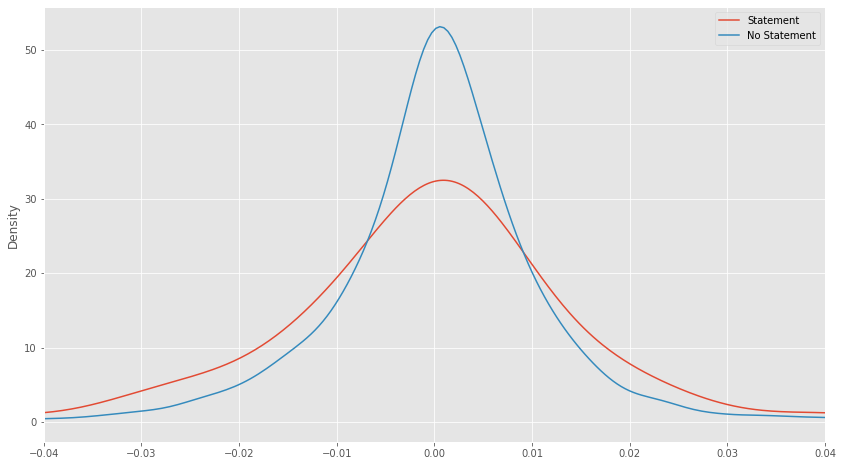

In [99]:
fig, ax = plt.subplots(figsize=(14,8))
spx_statements[spx_statements['Statement']==1]['close_pct_change'].plot.density(ax=ax,bw_method='silverman', label='Statement')
spx_statements[spx_statements['Statement']==0]['close_pct_change'].plot.density(ax=ax,bw_method='silverman', label = 'No Statement')
ax.set_xlim(-0.04,0.04)
ax.legend()


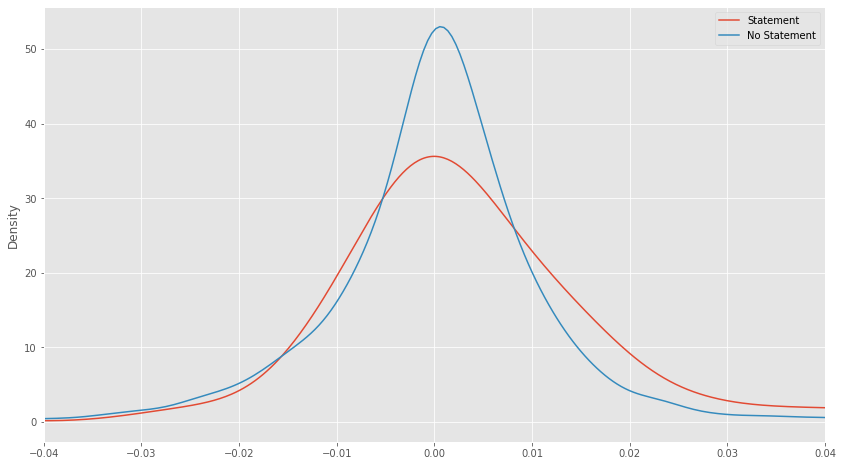

In [100]:
fig, ax = plt.subplots(figsize=(14,8))
spx_statements[spx_statements['Statement']==1]['prev_close_change'].plot.density(ax=ax,bw_method='silverman', label='Statement')
spx_statements[spx_statements['Statement']==0]['prev_close_change'].plot.density(ax=ax,bw_method='silverman', label = 'No Statement')
ax.set_xlim(-0.04,0.04)
ax.legend()

In [101]:
spx_statements[['polarity', 'subjectivity']] = spx_statements[['polarity', 'subjectivity']].fillna(value=0)
spx_statements[['LM_POS','LM_neg','CB_POS','CB_neg','word_count']] = spx_statements[['LM_POS','LM_neg','CB_POS','CB_neg','word_count']].fillna(value=0)


In [102]:
spx_nostate = spx_statements[spx_statements['Statement']==0]['close_pct_change'].dropna()
spx_yesstate=spx_statements[spx_statements['Statement']==1]['close_pct_change']

In [103]:
sm.stats.ttest_ind(spx_yesstate,spx_nostate)

(-1.4533068152620539, 0.14620371385155592, 4818.0)

In [104]:
spx_statements[spx_statements['Statement']==0]['close_pct_change'].head()

2000-01-03   -0.038312
2000-01-04    0.001922
2000-01-05    0.000956
2000-01-06    0.027090
2000-01-07    0.011190
Name: close_pct_change, dtype: float64

In [105]:
spx_statements[spx_statements['Statement']==1]['close_pct_change'].head()

2000-02-02    0.011248
2000-03-21    0.004532
2000-05-16   -0.012442
2000-06-28   -0.008544
2000-08-22    0.005233
Name: close_pct_change, dtype: float64

In [106]:
poli_leader = pd.DataFrame({'Date':spx_statements.index})

In [107]:
def chairperson(x):
    if '2006-01-31'>=str(x)>='2000-01-01':
        return 'Greenspan'
    elif '2014-01-31'>=str(x)>='2006-02-01':
        return 'Bernanke'
    elif '2018-02-03'>=str(x)>='2014-02-03':
        return 'Yellen'
    else: 
        return 'Powell'
    
def president(x):
    if '2001-01-20'>str(x)>='2000-01-01':
        return 'Clinton'
    elif '2009-01-20'>str(x)>='2001-01-20':
        return 'Bush'
    elif '2017-01-20'>str(x)>='2009-01-20':
        return 'Obama'
    else: 
        return 'Trump'

In [108]:
poli_leader['fed_chair']=poli_leader['Date'].apply(chairperson)
poli_leader['president']=poli_leader['Date'].apply(president)

In [109]:
poli_leader.head()

,Date,fed_chair,president
0,2000-01-03,Greenspan,Clinton
1,2000-01-04,Greenspan,Clinton
2,2000-01-05,Greenspan,Clinton
3,2000-01-06,Greenspan,Clinton
4,2000-01-07,Greenspan,Clinton


In [110]:
poli_leader = poli_leader.set_index(['Date'])

In [111]:
poli_leader[['fed_chair','president']]=poli_leader[['fed_chair','president']].astype('category')


In [112]:
poli_leader['fed_chair']

Date
2000-01-03    Greenspan
2000-01-04    Greenspan
2000-01-05    Greenspan
2000-01-06    Greenspan
2000-01-07    Greenspan
                ...    
2019-02-25       Powell
2019-02-26       Powell
2019-02-27       Powell
2019-02-28       Powell
2019-03-01       Powell
Name: fed_chair, Length: 4821, dtype: category
Categories (4, object): [Bernanke, Greenspan, Powell, Yellen]

In [113]:
spx_statements=spx_statements.join(poli_leader,how='inner')

In [114]:
spx_statements[spx_statements['Summary of Econ Projections']==1]['close_pct_change'].describe()

count    46.000000
mean     -0.000870
std       0.014642
min      -0.033120
25%      -0.007792
50%       0.000349
75%       0.006571
max       0.025804
Name: close_pct_change, dtype: float64

In [115]:
spx_statements[['president','fed_chair']].describe()

,president,fed_chair
count,4821,4821
unique,4,4
top,Obama,Bernanke
freq,2016,2014


In [116]:
from pandas.plotting import autocorrelation_plot

Text(0.5, 0, 'Date')

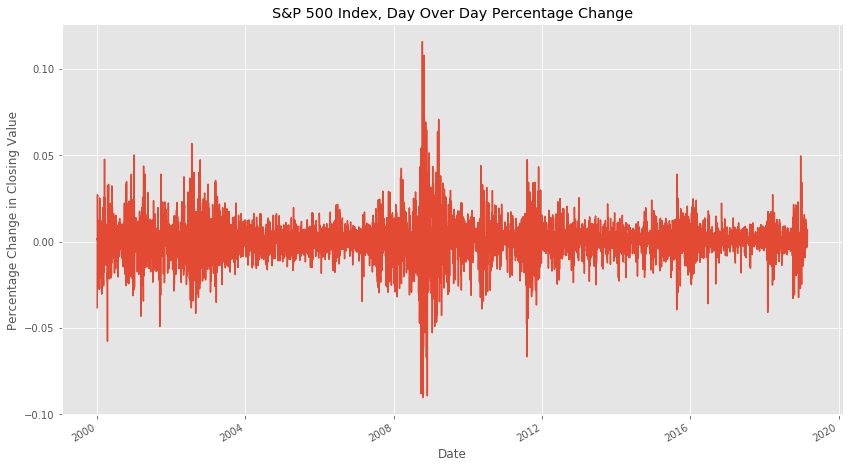

In [117]:
plt.figure()
spx_statements['Close*100']=spx_statements['close_pct_change']*100
spx_statements['close_pct_change'].plot(y='%',figsize=(14,8),title='S&P 500 Index, Day Over Day Percentage Change')
plt.ylabel('Percentage Change in Closing Value')
plt.xlabel('Date')

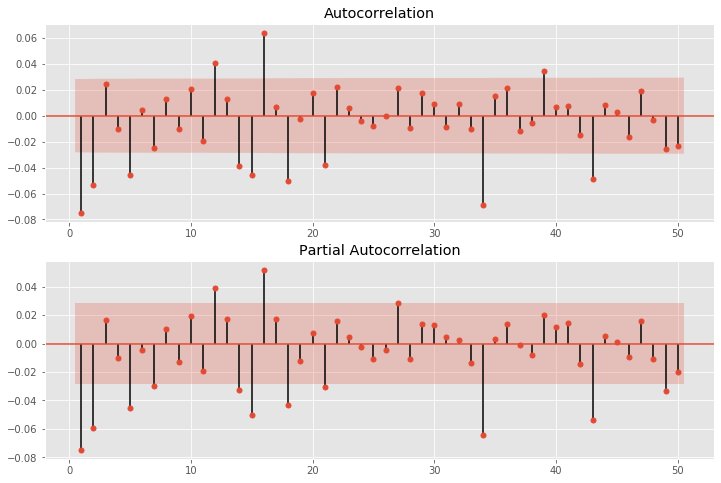

In [118]:
fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(spx_statements.dropna()['Close'].values,lags = 40,ax=ax1)
ax2=fig.add_subplot(211)

fig=sm.graphics.tsa.plot_acf(spx_statements.dropna()['close_pct_change'].values,lags = 50,ax=ax2,zero=False)
ax3=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(spx_statements.dropna()['close_pct_change'].values, lags=50, ax=ax3,zero=False)

In [119]:
sm.tsa.acf(spx_statements.dropna()['close_pct_change'],nlags = 40)

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.00000000e+00, -7.47270526e-02, -5.35277130e-02,  2.47141294e-02,
       -1.02067102e-02, -4.54464201e-02,  4.40729913e-03, -2.47218700e-02,
        1.28003957e-02, -1.05523929e-02,  2.04557465e-02, -1.96135272e-02,
        4.08845623e-02,  1.29501636e-02, -3.84351717e-02, -4.58344418e-02,
        6.38291498e-02,  6.42115078e-03, -5.05216738e-02, -2.61401822e-03,
        1.73215755e-02, -3.77046129e-02,  2.23082800e-02,  5.84714323e-03,
       -3.99685205e-03, -8.11305907e-03, -5.11225551e-04,  2.13902105e-02,
       -9.51493339e-03,  1.72690420e-02,  9.31647933e-03, -8.99875144e-03,
        9.00365511e-03, -1.00910349e-02, -6.89452075e-02,  1.49305959e-02,
        2.12184426e-02, -1.14315783e-02, -5.85511085e-03,  3.40775768e-02,
        6.54797658e-03])

In [120]:
spx_statements['Close'].autocorr(lag=500)

0.7838627732618093

In [121]:
from pandas.plotting import lag_plot

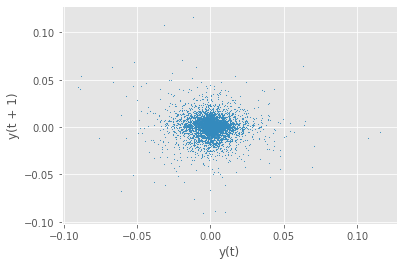

In [122]:
lag_plot(spx_statements['close_pct_change'], s= 0.3)

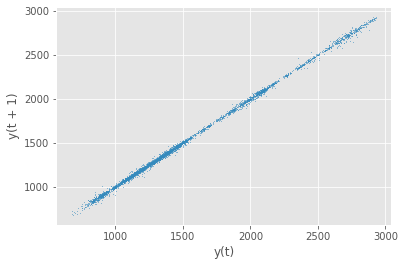

In [123]:
lag_plot(spx_statements['Close'],s =0.1)

In [124]:
arma_mod = sm.tsa.ARMA(spx_statements.dropna()['close_pct_change'], (2,0)).fit(disp=False)

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [125]:
arma_mod.params

const                     0.000207
ar.L1.close_pct_change   -0.079152
ar.L2.close_pct_change   -0.059426
dtype: float64

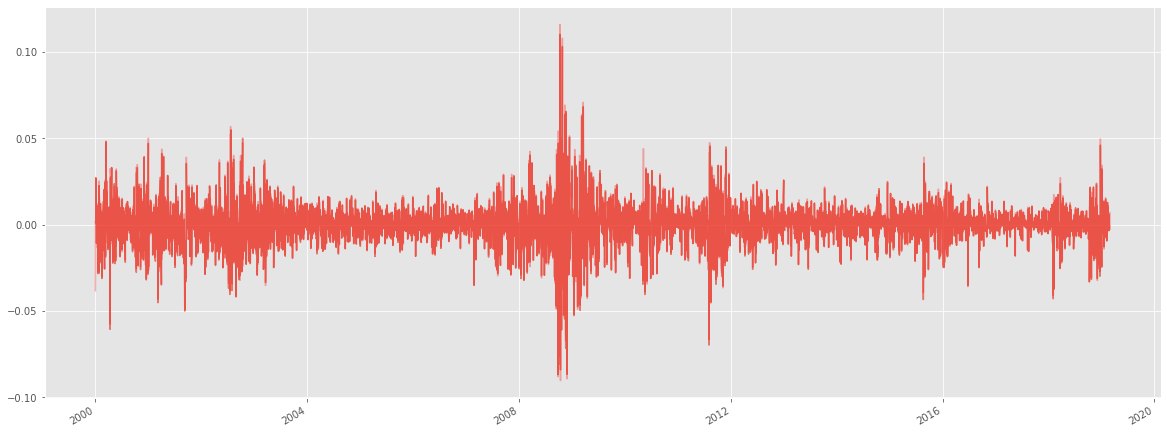

In [126]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax = arma_mod.resid.plot(ax=ax,alpha=0.7);
spx_statements['close_pct_change'].plot(ax=ax,c='red',alpha=0.3)

In [127]:
from scipy import stats
stats.normaltest(arma_mod.resid)

NormaltestResult(statistic=770.098041346708, pvalue=5.961218757262194e-168)

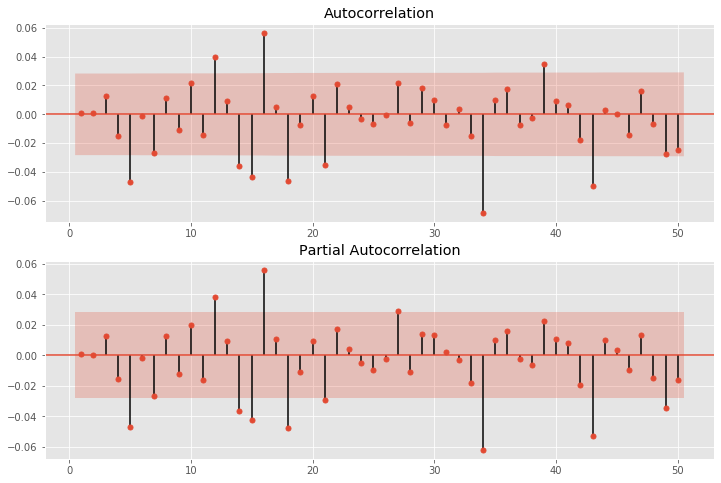

In [128]:
fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(spx_statements.dropna()['Close'].values,lags = 40,ax=ax1)
ax2=fig.add_subplot(211)

fig=sm.graphics.tsa.plot_acf(arma_mod.resid,lags = 50,ax=ax2,zero=False)
ax3=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_mod.resid, lags=50, ax=ax3,zero=False)

In [129]:

len(arma_mod.resid)

4814

In [130]:
resid=pd.DataFrame({'residuals':arma_mod.resid})


In [131]:
spx_statements = spx_statements.join(resid,how='inner')

In [132]:
spx_statements

,Open,High,Low,Close,Volume,Summary of Econ Projections,polarity,subjectivity,LM_POS,LM_neg,...,prev_close_change,two_pct_change,three_pct_change,four_pct_change,five_pct_change,open_pct_change,fed_chair,president,Close*100,residuals
2000-01-04,1455.21997,1455.21997,1397.43005,1399.42004,1.216500e+09,0.0,0.0,0.0,0.0,0.0,...,-0.038312,0.002880,0.030048,0.041574,0.027969,-0.009549,Greenspan,Clinton,0.192219,0.001715
2000-01-05,1399.42004,1413.27002,1377.68005,1402.10999,1.422400e+09,0.0,0.0,0.0,0.0,0.0,...,0.001922,0.028072,0.039576,0.025997,0.021346,-0.038345,Greenspan,Clinton,0.095567,0.000877
2000-01-06,1402.10999,1411.90002,1392.02002,1403.44995,1.322900e+09,0.0,0.0,0.0,0.0,0.0,...,0.000956,0.038584,0.025017,0.020371,0.032940,0.001922,Greenspan,Clinton,2.709040,0.027045
2000-01-07,1403.44995,1441.46997,1400.72998,1441.46997,1.472800e+09,0.0,0.0,0.0,0.0,0.0,...,0.027090,-0.002019,-0.006542,0.005696,0.016428,0.000956,Greenspan,Clinton,1.118997,0.013155
2000-01-10,1441.46997,1464.35999,1441.46997,1457.59998,1.290900e+09,0.0,0.0,0.0,0.0,0.0,...,0.011190,-0.017536,-0.005434,0.005180,-0.001688,0.027090,Greenspan,Clinton,-1.306251,-0.010803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-15,2760.23999,2775.65991,2760.23999,2775.60010,2.394900e+09,0.0,0.0,0.0,0.0,0.0,...,0.010879,0.003279,-0.000259,0.006150,0.007389,0.006102,Powell,Trump,0.149874,0.001967
2019-02-19,2769.28003,2787.33008,2767.29004,2779.76001,2.011800e+09,0.0,0.0,0.0,0.0,0.0,...,0.001499,-0.001756,0.004644,0.005882,0.005087,0.003275,Powell,Trump,0.177711,0.002307
2019-02-20,2779.05005,2789.87988,2774.06006,2784.69995,2.204400e+09,0.0,0.0,0.0,0.0,0.0,...,0.001777,0.002862,0.004097,0.003304,0.002758,0.003528,Powell,Trump,-0.352644,-0.003532
2019-02-21,2780.23999,2781.58008,2764.55005,2774.87988,2.014500e+09,0.0,0.0,0.0,0.0,0.0,...,-0.003526,0.007651,0.006854,0.006307,0.003463,0.000428,Powell,Trump,0.641110,0.006002


In [133]:
pd.DataFrame(spx_statements[spx_statements['Statement']==0]['residuals'].describe())

,residuals
count,4652.000000
mean,0.000049
std,0.011837
min,-0.086868
25%,-0.004946
50%,0.000520
75%,0.005371
max,0.110108


In [134]:
pd.DataFrame(spx_statements[spx_statements['Statement']==1]['residuals'].describe())

,residuals
count,162.000000
mean,-0.001392
std,0.015095
min,-0.080710
25%,-0.008336
50%,0.000223
75%,0.006243
max,0.037794


In [135]:
sm.stats.ttest_ind(spx_statements[spx_statements['Statement']==1]['residuals'],
                   spx_statements[spx_statements['Statement']==0]['residuals'])

(-1.506461415122848, 0.1320144047963604, 4812.0)

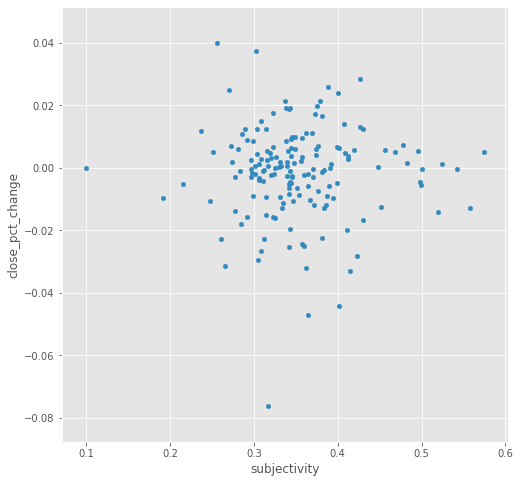

In [136]:
spx_statements[spx_statements['Statement']==1].plot.scatter('subjectivity','close_pct_change', figsize=(8,8))

Text(0.5, 0, 'Loughran & Mcdonald positive sentiment words')

<Figure size 432x288 with 0 Axes>

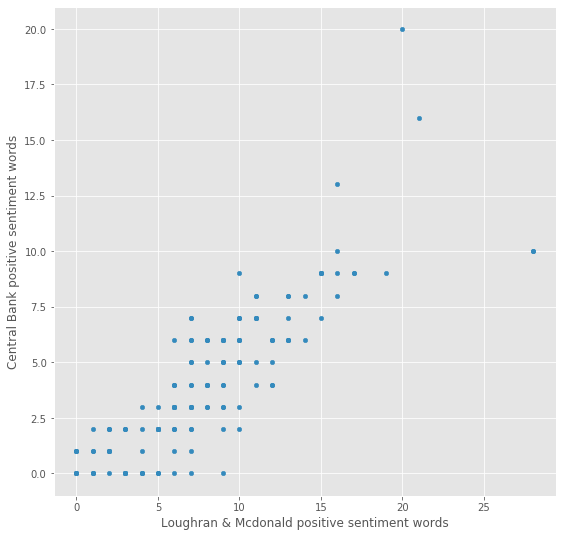

In [137]:
plt.figure()
spx_statements[spx_statements['Statement']==1].plot.scatter(x='LM_POS',y='CB_POS', figsize=(9,9))
plt.ylabel('Central Bank positive sentiment words')
plt.xlabel('Loughran & Mcdonald positive sentiment words')



Text(0.5, 0, 'Loughran & Mcdonald negative sentiment words')

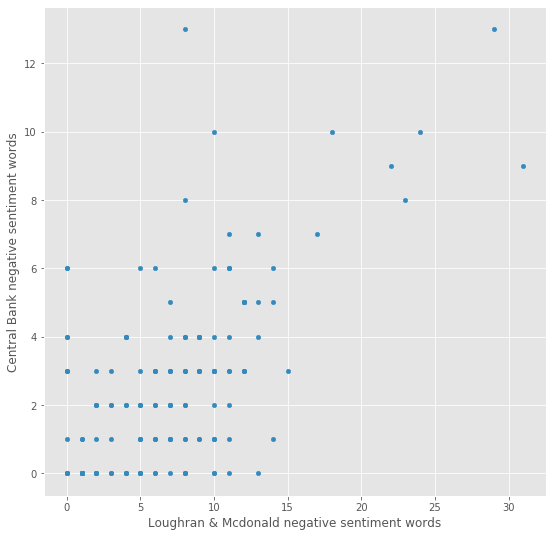

In [138]:
spx_statements[spx_statements['Statement']==1].plot.scatter('LM_neg','CB_neg',figsize=(9,9))
plt.ylabel('Central Bank negative sentiment words')
plt.xlabel('Loughran & Mcdonald negative sentiment words')

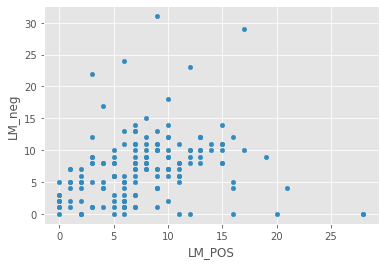

In [139]:
spx_statements[spx_statements['Statement']==1].plot.scatter('LM_POS','LM_neg')

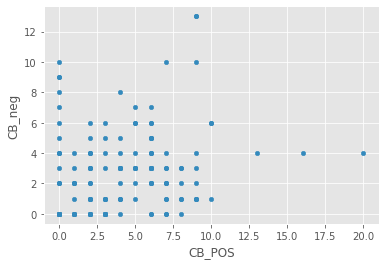

In [140]:
spx_statements[spx_statements['Statement']==1].plot.scatter('CB_POS','CB_neg')

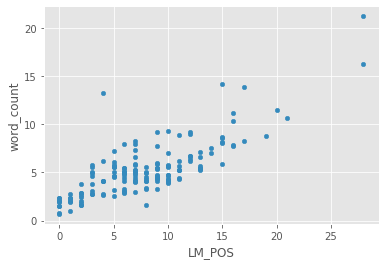

In [141]:
spx_statements[spx_statements['Statement']==1].plot.scatter('LM_POS','word_count')

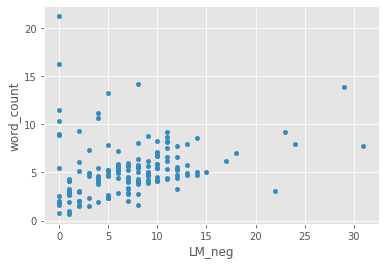

In [142]:
spx_statements[spx_statements['Statement']==1].plot.scatter('LM_neg','word_count')

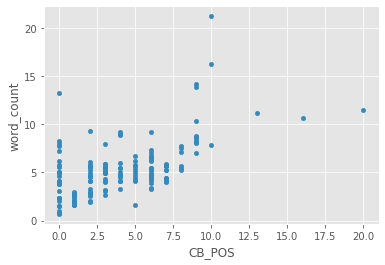

In [143]:
spx_statements[spx_statements['Statement']==1].plot.scatter('CB_POS','word_count')

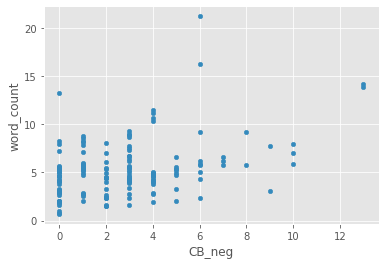

In [144]:
spx_statements[spx_statements['Statement']==1].plot.scatter('CB_neg','word_count')

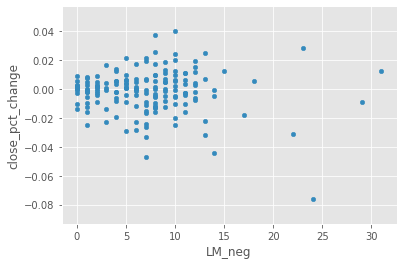

In [145]:
spx_statements[spx_statements['Statement']==1].plot.scatter('LM_neg','close_pct_change')

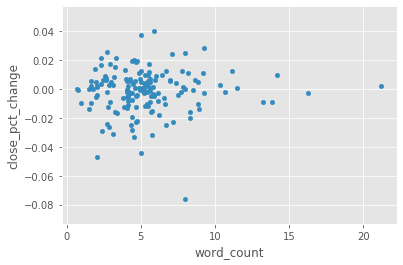

In [146]:
spx_statements[spx_statements['Statement']==1].plot.scatter('word_count','close_pct_change')

Text(0.5, 0, 'Subjectivity')

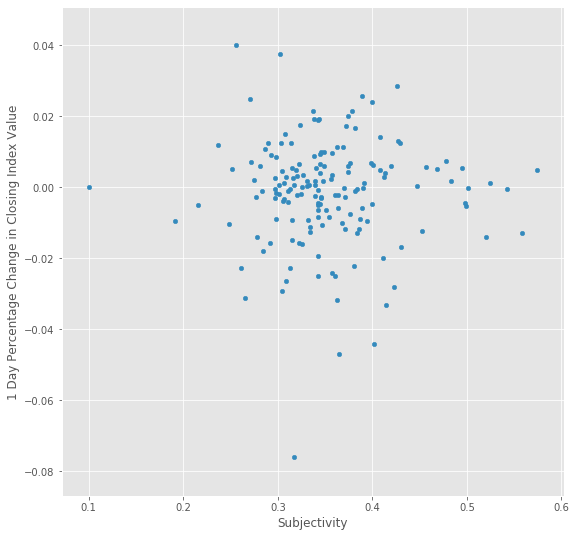

In [147]:
spx_statements[spx_statements['Statement']==1].plot.scatter('subjectivity','close_pct_change', figsize=(9,9))
plt.ylabel('1 Day Percentage Change in Closing Index Value')
plt.xlabel('Subjectivity')


Text(0.5, 0, 'Polarity')

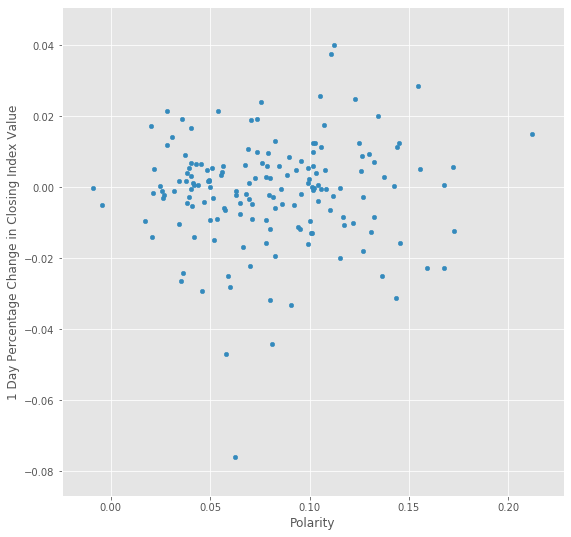

In [148]:
spx_statements[spx_statements['Statement']==1].plot.scatter('polarity','close_pct_change', figsize=(9,9))
plt.ylabel('1 Day Percentage Change in Closing Index Value')
plt.xlabel('Polarity')

In [149]:
results = sm.formula.ols('close_pct_change ~ polarity + subjectivity', data=spx_statements[spx_statements['Statement']==1]).fit()

In [150]:
print(results.summary())
results.bse #standard errors

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.1920
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.826
Time:                        21:07:13   Log-Likelihood:                 451.81
No. Observations:                 162   AIC:                            -897.6
Df Residuals:                     159   BIC:                            -888.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0022      0.007     -0.329   

Intercept       0.006646
polarity        0.029772
subjectivity    0.017526
dtype: float64

In [151]:
pol_results = sm.formula.ols('close_pct_change ~ polarity', data=spx_statements[spx_statements['Statement']==1]).fit()
print(pol_results.summary())
pol_results.bse

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3733
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.542
Time:                        21:07:13   Log-Likelihood:                 451.80
No. Observations:                 162   AIC:                            -899.6
Df Residuals:                     160   BIC:                            -893.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0029      0.003     -1.080      0.2

Intercept    0.002662
polarity     0.029658
dtype: float64

In [152]:
subj_results = sm.formula.ols('close_pct_change ~ subjectivity', data=spx_statements[spx_statements['Statement']==1]).fit()
print(subj_results.summary())
subj_results.bse

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                  0.008183
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.928
Time:                        21:07:13   Log-Likelihood:                 451.62
No. Observations:                 162   AIC:                            -899.2
Df Residuals:                     160   BIC:                            -893.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0009      0.006     -0.137   

Intercept       0.006273
subjectivity    0.017479
dtype: float64

In [153]:
pd.get_dummies(spx_statements,columns=['fed_chair','president']).head()

,Open,High,Low,Close,Volume,Summary of Econ Projections,polarity,subjectivity,LM_POS,LM_neg,...,Close*100,residuals,fed_chair_Bernanke,fed_chair_Greenspan,fed_chair_Powell,fed_chair_Yellen,president_Bush,president_Clinton,president_Obama,president_Trump
2000-01-04,1455.21997,1455.21997,1397.43005,1399.42004,1.216500e+09,0.0,0.0,0.0,0.0,0.0,...,0.192219,0.001715,0,1,0,0,0,1,0,0
2000-01-05,1399.42004,1413.27002,1377.68005,1402.10999,1.422400e+09,0.0,0.0,0.0,0.0,0.0,...,0.095567,0.000877,0,1,0,0,0,1,0,0
2000-01-06,1402.10999,1411.90002,1392.02002,1403.44995,1.322900e+09,0.0,0.0,0.0,0.0,0.0,...,2.709040,0.027045,0,1,0,0,0,1,0,0
2000-01-07,1403.44995,1441.46997,1400.72998,1441.46997,1.472800e+09,0.0,0.0,0.0,0.0,0.0,...,1.118997,0.013155,0,1,0,0,0,1,0,0
2000-01-10,1441.46997,1464.35999,1441.46997,1457.59998,1.290900e+09,0.0,0.0,0.0,0.0,0.0,...,-1.306251,-0.010803,0,1,0,0,0,1,0,0


In [154]:
results_2 = sm.formula.ols('close_pct_change ~ polarity + subjectivity +C(president)+(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(results_2.summary())
print(results_2.bse,'\n')
print(results_2.params)

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.379
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.210
Time:                        21:07:13   Log-Likelihood:                 457.25
No. Observations:                 162   AIC:                            -896.5
Df Residuals:                     153   BIC:                            -868.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [155]:
results_3 = sm.formula.ols('close_pct_change ~Statement +C(president) +C(fed_chair)', data=spx_statements).fit()
print(results_3.summary())
print(results_3.bse,'\n')
print(results_3.params)

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.168
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.318
Time:                        21:07:13   Log-Likelihood:                 14459.
No. Observations:                4814   AIC:                        -2.890e+04
Df Residuals:                    4806   BIC:                        -2.885e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [156]:
results_stateonly = sm.formula.ols('close_pct_change ~Statement', data=spx_statements).fit()
print(results_stateonly.summary())
results_stateonly.bse

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.063
Date:                Thu, 05 Mar 2020   Prob (F-statistic):             0.0802
Time:                        21:07:13   Log-Likelihood:                 14456.
No. Observations:                4814   AIC:                        -2.891e+04
Df Residuals:                    4812   BIC:                        -2.889e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.000      1.497      0.1

Intercept    0.000176
Statement    0.000960
dtype: float64

In [157]:
results_state_pres = sm.formula.ols('close_pct_change ~Statement+C(president)', data=spx_statements).fit()
print(results_state_pres.summary())
results_state_pres.bse

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.718
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.143
Time:                        21:07:13   Log-Likelihood:                 14458.
No. Observations:                4814   AIC:                        -2.891e+04
Df Residuals:                    4809   BIC:                        -2.887e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Intercept                  0.000270
C(president)[T.Clinton]    0.000786
C(president)[T.Obama]      0.000379
C(president)[T.Trump]      0.000588
Statement                  0.000960
dtype: float64

In [158]:
pre_fomc_results = sm.formula.ols('prev_close_change ~Statement +C(president) +C(fed_chair)', data=spx_statements).fit()
print(pre_fomc_results.summary())
print(pre_fomc_results.bse,'\n')
print(pre_fomc_results.params)

                            OLS Regression Results                            
Dep. Variable:      prev_close_change   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.238
Date:                Thu, 05 Mar 2020   Prob (F-statistic):             0.0285
Time:                        21:07:13   Log-Likelihood:                 14451.
No. Observations:                4814   AIC:                        -2.889e+04
Df Residuals:                    4806   BIC:                        -2.883e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Percent change on open price change as dependent variable.

In [159]:
open_results = sm.formula.ols('open_pct_change ~Statement +C(president) +C(fed_chair)', data=spx_statements).fit()
print(open_results.summary())
open_results.bse

                            OLS Regression Results                            
Dep. Variable:        open_pct_change   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8054
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.583
Time:                        21:07:13   Log-Likelihood:                 14629.
No. Observations:                4814   AIC:                        -2.924e+04
Df Residuals:                    4806   BIC:                        -2.919e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Intercept                    0.000426
C(president)[T.Clinton]      0.000785
C(president)[T.Obama]        0.000535
C(president)[T.Trump]        0.000985
C(fed_chair)[T.Greenspan]    0.000535
C(fed_chair)[T.Powell]       0.001134
C(fed_chair)[T.Yellen]       0.000534
Statement                    0.000927
dtype: float64

In [160]:
spx_statements['abs_return']=spx_statements['close_pct_change'].abs()

In [161]:
results_4 = sm.formula.ols('abs_return ~Statement +C(president) +C(fed_chair)', data=spx_statements).fit()
print(results_4.summary())
results_4.bse

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     27.22
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           6.63e-37
Time:                        21:07:13   Log-Likelihood:                 15957.
No. Observations:                4814   AIC:                        -3.190e+04
Df Residuals:                    4806   BIC:                        -3.185e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Intercept                    0.000323
C(president)[T.Clinton]      0.000596
C(president)[T.Obama]        0.000406
C(president)[T.Trump]        0.000747
C(fed_chair)[T.Greenspan]    0.000406
C(fed_chair)[T.Powell]       0.000861
C(fed_chair)[T.Yellen]       0.000405
Statement                    0.000704
dtype: float64

In [162]:
spx_statements['abs_return'].describe()

count    4814.000000
mean        0.008000
std         0.008969
min         0.000000
25%         0.002164
50%         0.005335
75%         0.010687
max         0.115800
Name: abs_return, dtype: float64

In [163]:
results_5 = sm.formula.ols('abs_return ~polarity+ subjectivity', data=spx_statements).fit()
print(results_5.summary())
results_5.bse

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.139
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           0.000296
Time:                        21:07:13   Log-Likelihood:                 15871.
No. Observations:                4814   AIC:                        -3.174e+04
Df Residuals:                    4811   BIC:                        -3.172e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0079      0.000     60.346   

Intercept       0.000131
polarity        0.016790
subjectivity    0.004211
dtype: float64

In [164]:
statement_result = sm.formula.ols('abs_return ~polarity+ subjectivity', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())
statement_result.bse

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.549
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.216
Time:                        21:07:13   Log-Likelihood:                 505.97
No. Observations:                 162   AIC:                            -1006.
Df Residuals:                     159   BIC:                            -996.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0100      0.005      2.097   

Intercept       0.004758
polarity        0.021312
subjectivity    0.012546
dtype: float64

In [165]:
two_period_result = sm.formula.ols('two_pct_change ~ polarity + subjectivity', data=spx_statements[spx_statements['Statement']==1]).fit()
print(two_period_result.summary())
two_period_result.bse

                            OLS Regression Results                            
Dep. Variable:         two_pct_change   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1568
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.855
Time:                        21:07:13   Log-Likelihood:                 422.83
No. Observations:                 162   AIC:                            -839.7
Df Residuals:                     159   BIC:                            -830.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0002      0.008      0.025   

Intercept       0.007948
polarity        0.035603
subjectivity    0.020959
dtype: float64

In [166]:
three_period_result = sm.formula.ols('three_pct_change ~ polarity + subjectivity', data=spx_statements[spx_statements['Statement']==1]).fit()
print(three_period_result.summary())
three_period_result.bse

                            OLS Regression Results                            
Dep. Variable:       three_pct_change   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.3391
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.713
Time:                        21:07:13   Log-Likelihood:                 409.36
No. Observations:                 162   AIC:                            -812.7
Df Residuals:                     159   BIC:                            -803.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0053      0.009      0.613   

Intercept       0.008638
polarity        0.038691
subjectivity    0.022776
dtype: float64

In [167]:
four_period_result = sm.formula.ols('four_pct_change ~ polarity + subjectivity', data=spx_statements[spx_statements['Statement']==1]).fit()
print(four_period_result.summary())
four_period_result.bse

                            OLS Regression Results                            
Dep. Variable:        four_pct_change   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2053
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.815
Time:                        21:07:13   Log-Likelihood:                 394.83
No. Observations:                 162   AIC:                            -783.7
Df Residuals:                     159   BIC:                            -774.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0051      0.009      0.536   

Intercept       0.009448
polarity        0.042320
subjectivity    0.024913
dtype: float64

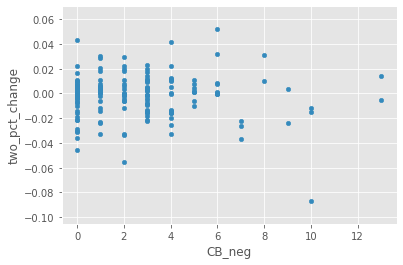

In [168]:
spx_statements[spx_statements['Statement']==1].plot.scatter('CB_neg','two_pct_change')

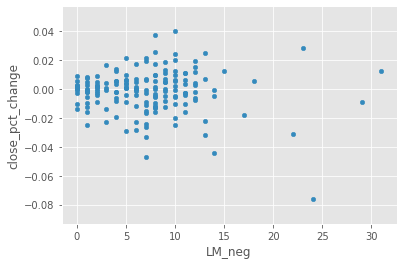

In [169]:
spx_statements[spx_statements['Statement']==1].plot.scatter('LM_neg','close_pct_change')

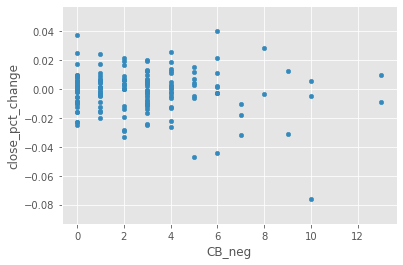

In [170]:
spx_statements[spx_statements['Statement']==1].plot.scatter('CB_neg','close_pct_change')

In [171]:
five_period_result = sm.formula.ols('five_pct_change ~ polarity + subjectivity', data=spx_statements[spx_statements['Statement']==1]).fit()
print(five_period_result.summary())
five_period_result.bse

                            OLS Regression Results                            
Dep. Variable:        five_pct_change   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1552
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.856
Time:                        21:07:14   Log-Likelihood:                 386.39
No. Observations:                 162   AIC:                            -766.8
Df Residuals:                     159   BIC:                            -757.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0037      0.010      0.367   

Intercept       0.009953
polarity        0.044583
subjectivity    0.026245
dtype: float64

In [172]:
pd.DataFrame(spx_statements[spx_statements['Statement']==0]['two_pct_change'].describe())

,two_pct_change
count,4652.000000
mean,0.000490
std,0.016283
min,-0.124174
25%,-0.007026
50%,0.001065
75%,0.008731
max,0.132064


In [173]:
pd.DataFrame(spx_statements[spx_statements['Statement']==1]['two_pct_change'].describe())

,two_pct_change
count,162.000000
mean,-0.001820
std,0.017865
min,-0.087031
25%,-0.012055
50%,0.000152
75%,0.007418
max,0.052058


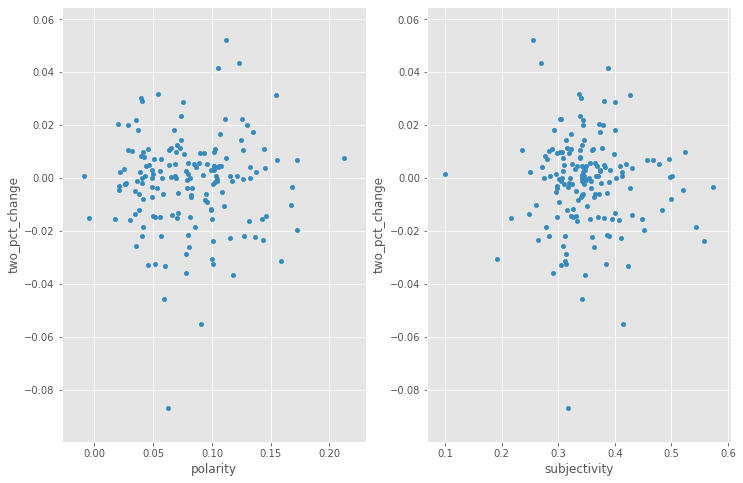

In [174]:
fig_2 = plt.figure(figsize=(12,8))
ax_1= fig_2.add_subplot(121)
spx_statements[spx_statements['Statement']==1].plot.scatter('polarity','two_pct_change',ax=ax_1)

ax_2= fig_2.add_subplot(122)
spx_statements[spx_statements['Statement']==1].plot.scatter('subjectivity','two_pct_change',ax=ax_2)

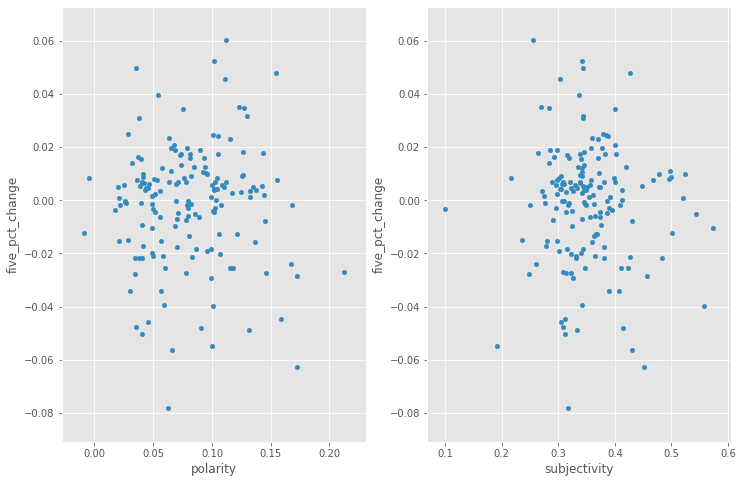

In [175]:
fig_3 = plt.figure(figsize=(12,8))
ax_1= fig_3.add_subplot(121)
spx_statements[spx_statements['Statement']==1].plot.scatter('polarity','five_pct_change',ax=ax_1)

ax_2= fig_3.add_subplot(122)
spx_statements[spx_statements['Statement']==1].plot.scatter('subjectivity','five_pct_change',ax=ax_2)

In [176]:
statement_result = sm.formula.ols('abs_return ~ subjectivity+C(president) +C(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())
statement_result.bse

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.249
Date:                Thu, 05 Mar 2020   Prob (F-statistic):             0.0332
Time:                        21:07:14   Log-Likelihood:                 512.29
No. Observations:                 162   AIC:                            -1009.
Df Residuals:                     154   BIC:                            -983.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Intercept                    0.006066
C(president)[T.Clinton]      0.003945
C(president)[T.Obama]        0.002566
C(president)[T.Trump]        0.004507
C(fed_chair)[T.Greenspan]    0.002860
C(fed_chair)[T.Powell]       0.005112
C(fed_chair)[T.Yellen]       0.002662
subjectivity                 0.014138
dtype: float64

In [177]:
statement_result = sm.formula.ols('abs_return ~ polarity+C(president) +C(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())
statement_result.bse

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     2.057
Date:                Thu, 05 Mar 2020   Prob (F-statistic):             0.0514
Time:                        21:07:14   Log-Likelihood:                 511.64
No. Observations:                 162   AIC:                            -1007.
Df Residuals:                     154   BIC:                            -982.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Intercept                    0.002420
C(president)[T.Clinton]      0.004093
C(president)[T.Obama]        0.002642
C(president)[T.Trump]        0.004466
C(fed_chair)[T.Greenspan]    0.002699
C(fed_chair)[T.Powell]       0.005137
C(fed_chair)[T.Yellen]       0.002663
polarity                     0.025073
dtype: float64

In [178]:
statement_result = sm.formula.ols('abs_return ~ polarity+subjectivity+C(president) +C(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())
statement_result.bse

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     2.355
Date:                Thu, 05 Mar 2020   Prob (F-statistic):             0.0204
Time:                        21:07:14   Log-Likelihood:                 513.81
No. Observations:                 162   AIC:                            -1010.
Df Residuals:                     153   BIC:                            -981.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Intercept                    0.006066
C(president)[T.Clinton]      0.004104
C(president)[T.Obama]        0.002683
C(president)[T.Trump]        0.004480
C(fed_chair)[T.Greenspan]    0.003028
C(fed_chair)[T.Powell]       0.005126
C(fed_chair)[T.Yellen]       0.002660
polarity                     0.025029
subjectivity                 0.014169
dtype: float64

Text(0, 0.5, '1 Day Absolute Percentage Change')

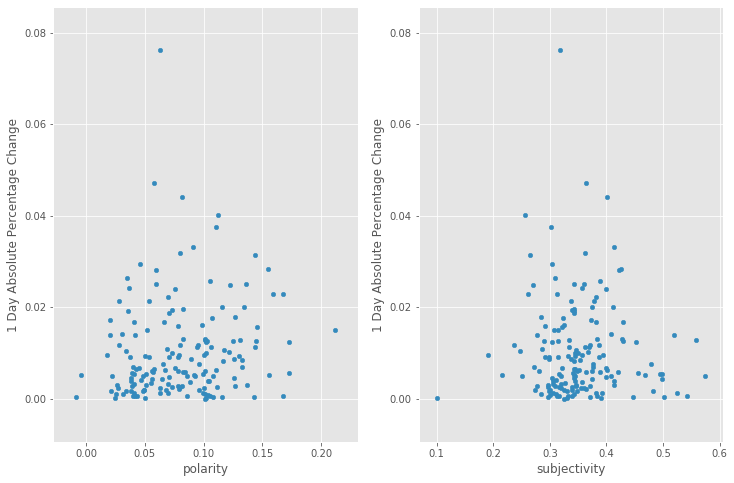

In [179]:
fig_3 = plt.figure(figsize=(12,8))
ax_1= fig_3.add_subplot(121)
spx_statements[spx_statements['Statement']==1].plot.scatter('polarity','abs_return',ax=ax_1)

plt.ylabel('1 Day Absolute Percentage Change')

ax_2= fig_3.add_subplot(122)
spx_statements[spx_statements['Statement']==1].plot.scatter('subjectivity','abs_return',ax=ax_2)

plt.ylabel('1 Day Absolute Percentage Change')

In [180]:
statement_result = sm.formula.ols('abs_return ~ subjectivity+C(president) +C(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())
statement_result.bse

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.249
Date:                Thu, 05 Mar 2020   Prob (F-statistic):             0.0332
Time:                        21:07:15   Log-Likelihood:                 512.29
No. Observations:                 162   AIC:                            -1009.
Df Residuals:                     154   BIC:                            -983.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Intercept                    0.006066
C(president)[T.Clinton]      0.003945
C(president)[T.Obama]        0.002566
C(president)[T.Trump]        0.004507
C(fed_chair)[T.Greenspan]    0.002860
C(fed_chair)[T.Powell]       0.005112
C(fed_chair)[T.Yellen]       0.002662
subjectivity                 0.014138
dtype: float64

In [181]:
spx_statements.reset_index().to_csv('dataset.csv')

In [182]:
statement_result.summary().as_latex

<bound method Summary.as_latex of <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.249
Date:                Thu, 05 Mar 2020   Prob (F-statistic):             0.0332
Time:                        21:07:15   Log-Likelihood:                 512.29
No. Observations:                 162   AIC:                            -1009.
Df Residuals:                     154   BIC:                            -983.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [183]:
sm.tsa.stattools.adfuller(spx_statements['close_pct_change'],regression='c')

(-16.2123777067034,
 3.974192228545072e-29,
 20,
 4793,
 {'1%': -3.4317150752448122,
  '5%': -2.8621432099133135,
  '10%': -2.5670910903532254},
 -28796.12209797174)

In [184]:
statement_result = sm.formula.ols('abs_return ~ polarity+C(president) +C(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())
statement_result.bse

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     2.057
Date:                Thu, 05 Mar 2020   Prob (F-statistic):             0.0514
Time:                        21:07:15   Log-Likelihood:                 511.64
No. Observations:                 162   AIC:                            -1007.
Df Residuals:                     154   BIC:                            -982.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Intercept                    0.002420
C(president)[T.Clinton]      0.004093
C(president)[T.Obama]        0.002642
C(president)[T.Trump]        0.004466
C(fed_chair)[T.Greenspan]    0.002699
C(fed_chair)[T.Powell]       0.005137
C(fed_chair)[T.Yellen]       0.002663
polarity                     0.025073
dtype: float64

In [185]:
statement_result = sm.formula.ols('close_pct_change ~CB_POS+CB_neg +C(president) +C(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())
print(statement_result.params,'\n')
print(statement_result.bse)

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.955
Date:                Thu, 05 Mar 2020   Prob (F-statistic):             0.0557
Time:                        21:07:15   Log-Likelihood:                 459.50
No. Observations:                 162   AIC:                            -901.0
Df Residuals:                     153   BIC:                            -873.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [186]:
statement_result = sm.formula.ols('close_pct_change ~CB_POS+CB_neg', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())
statement_result.bse

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.576
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.210
Time:                        21:07:15   Log-Likelihood:                 453.20
No. Observations:                 162   AIC:                            -900.4
Df Residuals:                     159   BIC:                            -891.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0013      0.002     -0.624      0.5

Intercept    0.002050
CB_POS       0.000361
CB_neg       0.000457
dtype: float64

In [187]:
statement_result = sm.formula.ols('prev_close_change ~CB_POS+CB_neg', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())
statement_result.bse

                            OLS Regression Results                            
Dep. Variable:      prev_close_change   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8523
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.428
Time:                        21:07:15   Log-Likelihood:                 464.87
No. Observations:                 162   AIC:                            -923.7
Df Residuals:                     159   BIC:                            -914.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0046      0.002      2.405      0.0

Intercept    0.001908
CB_POS       0.000336
CB_neg       0.000426
dtype: float64

In [188]:
statement_result = sm.formula.ols('close_pct_change ~ LM_POS+ LM_neg +C(president) +C(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())
print(statement_result.bse,'\n')
print(statement_result.params)

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.366
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.215
Time:                        21:07:15   Log-Likelihood:                 457.20
No. Observations:                 162   AIC:                            -896.4
Df Residuals:                     153   BIC:                            -868.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [189]:
statement_result = sm.formula.ols('close_pct_change ~ word_count+C(president) +C(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())
statement_result.bse

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.599
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.139
Time:                        21:07:15   Log-Likelihood:                 457.30
No. Observations:                 162   AIC:                            -898.6
Df Residuals:                     154   BIC:                            -873.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Intercept                    0.003071
C(president)[T.Clinton]      0.005615
C(president)[T.Obama]        0.003713
C(president)[T.Trump]        0.006269
C(fed_chair)[T.Greenspan]    0.004286
C(fed_chair)[T.Powell]       0.007141
C(fed_chair)[T.Yellen]       0.003731
word_count                   0.000497
dtype: float64

In [190]:
statement_result = sm.formula.ols('abs_return ~ word_count+C(president) +C(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())
statement_result.bse

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.749
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.102
Time:                        21:07:15   Log-Likelihood:                 510.60
No. Observations:                 162   AIC:                            -1005.
Df Residuals:                     154   BIC:                            -980.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Intercept                    0.002210
C(president)[T.Clinton]      0.004041
C(president)[T.Obama]        0.002672
C(president)[T.Trump]        0.004511
C(fed_chair)[T.Greenspan]    0.003084
C(fed_chair)[T.Powell]       0.005139
C(fed_chair)[T.Yellen]       0.002685
word_count                   0.000358
dtype: float64

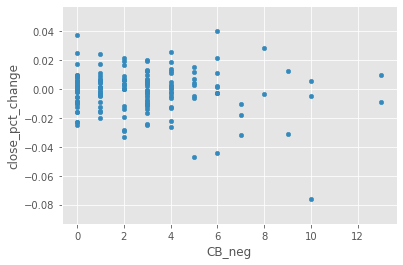

In [191]:
spx_statements[spx_statements['Statement']==1].plot.scatter('CB_neg','close_pct_change')


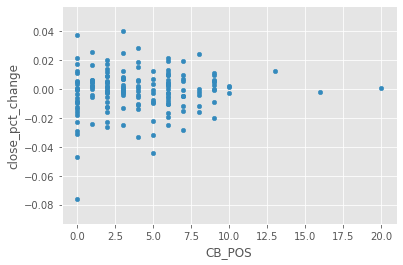

In [192]:
spx_statements[spx_statements['Statement']==1].plot.scatter('CB_POS','close_pct_change')


In [193]:
two_period_result_cb = sm.formula.ols('two_pct_change ~ CB_POS + CB_neg+C(president) +C(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(two_period_result_cb.summary())
two_period_result_cb.bse

                            OLS Regression Results                            
Dep. Variable:         two_pct_change   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.126
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.349
Time:                        21:07:16   Log-Likelihood:                 427.31
No. Observations:                 162   AIC:                            -836.6
Df Residuals:                     153   BIC:                            -808.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Intercept                    0.003573
C(president)[T.Clinton]      0.006789
C(president)[T.Obama]        0.004993
C(president)[T.Trump]        0.007596
C(fed_chair)[T.Greenspan]    0.004813
C(fed_chair)[T.Powell]       0.008783
C(fed_chair)[T.Yellen]       0.004715
CB_POS                       0.000539
CB_neg                       0.000649
dtype: float64

In [194]:
def test_f(var):
    print(var+1)

In [195]:
test_f(2)

3
